In [2]:
import numpy as np 
import pandas as pd 

from datetime import datetime
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# iot temperature dataset

In [10]:

df = pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/IOT-temp.csv', parse_dates=['noted_date'])

In [4]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


# preprocessing of iot temerature data

In [5]:
df = df.drop('room_id/id', axis=1)

In [6]:
df.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In


In [7]:
df.shape

(97606, 4)

In [8]:
df.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


creating new time stamp

In [11]:

df['measure_hour'] = df.noted_date.apply(lambda x:datetime.strftime(x,'%Y-%m-%d %H:00:00'))

In [12]:
data = df.groupby(['measure_hour','out/in']).temp.mean().reset_index()
data = data.pivot(index = 'measure_hour',columns = 'out/in', values = 'temp').reset_index().dropna()
data.head()

out/in,measure_hour,In,Out
0,2018-01-11 00:00:00,32.000000,40.071429
2,2018-01-11 02:00:00,31.750000,38.428571
3,2018-01-11 03:00:00,30.444444,40.666667
4,2018-01-11 04:00:00,30.000000,42.200000
5,2018-01-11 05:00:00,30.000000,43.875000


# visualisation part

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Temperature')

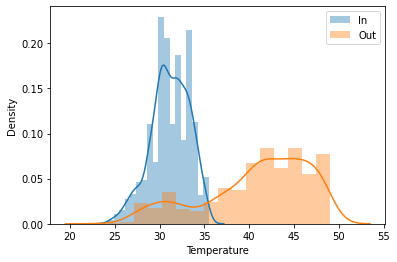

In [13]:
fig, ax = plt.subplots(figsize = (6,4))
g = sns.distplot(data.In, label = 'In')
g = sns.distplot(data.Out, label = 'Out')
plt.legend()
g.set_xlabel('Temperature')

<AxesSubplot:xlabel='Out', ylabel='In'>

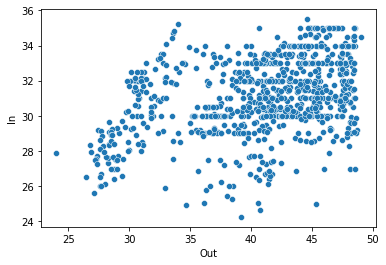

In [14]:
sns.scatterplot(x =data.Out, y = data.In)

<AxesSubplot:xlabel='Out', ylabel='In'>

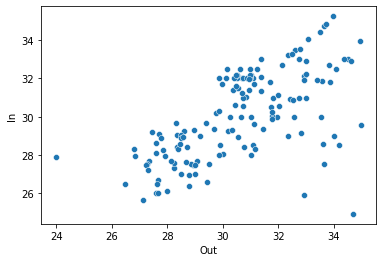

In [15]:
sns.scatterplot(x =data[data.Out<=35].Out, y = data[data.Out<=35].In)

#  regression (linear)

In [16]:
linear = data[(pd.notna(data.Out))&(pd.notna(data.In)) & (data.Out<35)]
linear = linear.drop(index = linear[((linear.Out>32)&(linear.In<30)|(linear.Out<25))].index, axis = 0)
model = LinearRegression()
model.fit(linear[['Out']],linear.In)

LinearRegression()

0.8934565680813321 3.0031835176757724


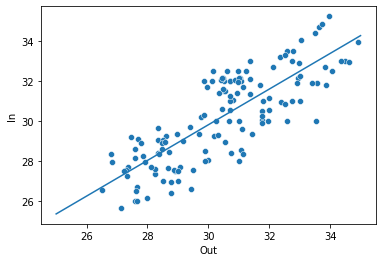

In [17]:
k,b = model.coef_[0],model.intercept_
print(k,b)
sns.scatterplot(x = linear.Out, y = linear.In)
reg_line = np.linspace(25,35,100)
plt.plot(reg_line, reg_line*k + b)

# classification based on in and out

In [18]:

df1 = pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/IOT-temp.csv')

In [19]:
df.head()

,id,room_id/id,noted_date,temp,out/in,measure_hour
0,__export__.temp_log_196134_bd201015,Room Admin,2018-08-12 09:30:00,29,In,2018-08-12 09:00:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-08-12 09:30:00,29,In,2018-08-12 09:00:00
2,__export__.temp_log_196127_522915e3,Room Admin,2018-08-12 09:29:00,41,Out,2018-08-12 09:00:00
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-08-12 09:29:00,41,Out,2018-08-12 09:00:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-08-12 09:29:00,31,In,2018-08-12 09:00:00


In [23]:
df2=df.drop(columns={'id','room_id/id','noted_date','measure_hour'},axis=1)

In [24]:
df2.isnull().sum()

temp      0
out/in    0
dtype: int64

In [25]:
df2['out/in'].unique()

array(['In', 'Out'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:

le.fit_transform(df2['out/in'])

array([0, 0, 1, ..., 0, 0, 0])

In [29]:
df2['out/in']=le.fit_transform(df2['out/in'])

In [30]:
df2.head()

,temp,out/in
0,29,0
1,29,0
2,41,1
3,41,1
4,31,0


In [31]:
input_cols=['temp']
output_cols=['out/in']


In [32]:
X=df2[input_cols]
y=df2[output_cols]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1730  4391]
 [ 1219 21942]]
              precision    recall  f1-score   support

           0       0.59      0.28      0.38      6121
           1       0.83      0.95      0.89     23161

    accuracy                           0.81     29282
   macro avg       0.71      0.62      0.63     29282
weighted avg       0.78      0.81      0.78     29282



In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

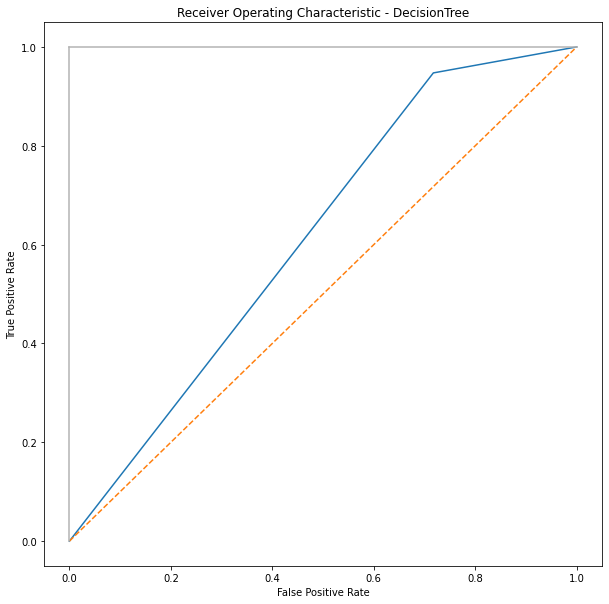

In [39]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()